In [ ]:
from tensorflow.keras import backend as K
from google.colab import files
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
K.clear_session()

In [ ]:
files.upload()

{}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d msambare/fer2013

!unzip fer2013.zip

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  fer2013.zip
replace test/angry/PrivateTest_10131363.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
base_model = load_model('/content/fer2013_mini_xception.hdf5', compile=False)

for layer in base_model.layers[:-7]:
    layer.trainable = True

x = base_model.layers[-2].output
x = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
selected_classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

In [ ]:
data_dir = '/content'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
train_generator = datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=(64, 64),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 22968 images belonging to 7 classes.


In [ ]:
val_generator = datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=(64,64),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 5741 images belonging to 7 classes.


In [ ]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    os.path.join(data_dir, 'test'),
    target_size=(64, 64),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 7178 images belonging to 7 classes.


In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 39s 61ms/step - accuracy: 0.2194 - loss: 2.9253 - val_accuracy: 0.3712 - val_loss: 1.7088
Epoch 2/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.3911 - loss: 1.6344 - val_accuracy: 0.4496 - val_loss: 1.4552
Epoch 3/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.4688 - loss: 1.3921 - val_accuracy: 0.4985 - val_loss: 1.3139
Epoch 4/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.5170 - loss: 1.2647 - val_accuracy: 0.5231 - val_loss: 1.2315
Epoch 5/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.5491 - loss: 1.1809 - val_accuracy: 0.5433 - val_loss: 1.1763
Epoch 6/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.5649 - loss: 1.1312 - val_accuracy: 0.5644 - val_loss: 1.1328
Epoch 7/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.5878 - loss: 1.0773 - val_accuracy: 0.5783 - val_loss: 1.1009
Epoch 8/20
359/359 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.6057 - loss: 1.0312 - val_accurac

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1, len(train_accuracy) + 1))

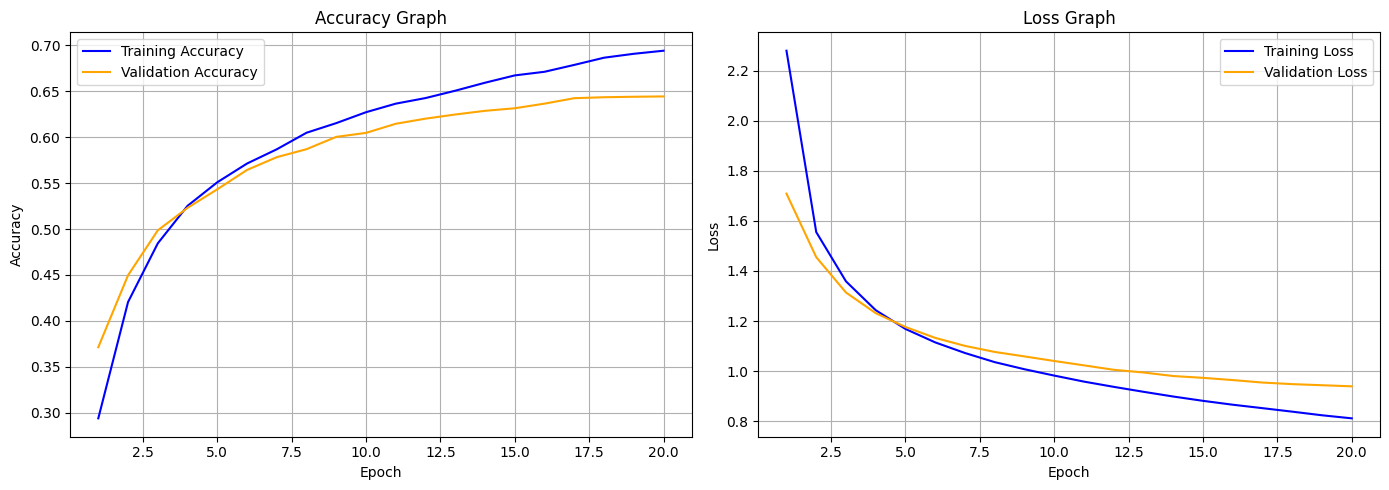

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(epochs, train_accuracy, label='Training Accuracy', color='blue')
ax1.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange')
ax1.set_title('Accuracy Graph')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

ax2.plot(epochs, train_loss, label='Training Loss', color='blue')
ax2.plot(epochs, val_loss, label='Validation Loss', color='orange')
ax2.set_title('Loss Graph')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
final_train_acc = train_accuracy[-1]
final_val_acc = val_accuracy[-1]

print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

Final Training Accuracy: 0.6943
Final Validation Accuracy: 0.6445


In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.5654 - loss: 1.2002

Test Accuracy: 62.41%


In [ ]:
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=selected_classes))

113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step

Classification Report:

              precision    recall  f1-score   support

       angry       0.53      0.52      0.52       958
     disgust       0.59      0.18      0.28       111
        fear       0.51      0.38      0.43      1024
       happy       0.83      0.86      0.84      1774
         sad       0.55      0.62      0.58      1233
    surprise       0.49      0.51      0.50      1247
     neutral       0.72      0.79      0.75       831

    accuracy                           0.62      7178
   macro avg       0.60      0.55      0.56      7178
weighted avg       0.62      0.62      0.62      7178



<Figure size 800x800 with 0 Axes>

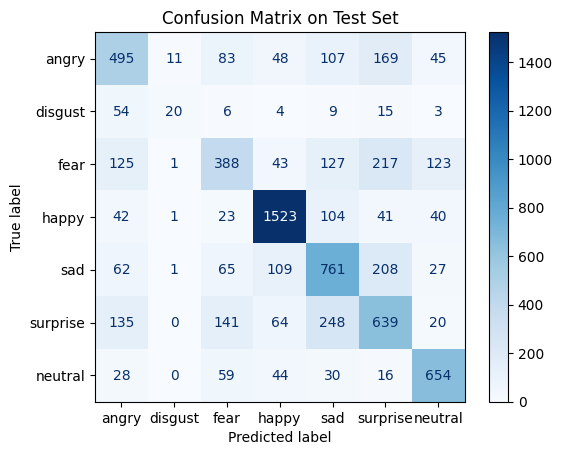

In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=selected_classes)

plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix on Test Set')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


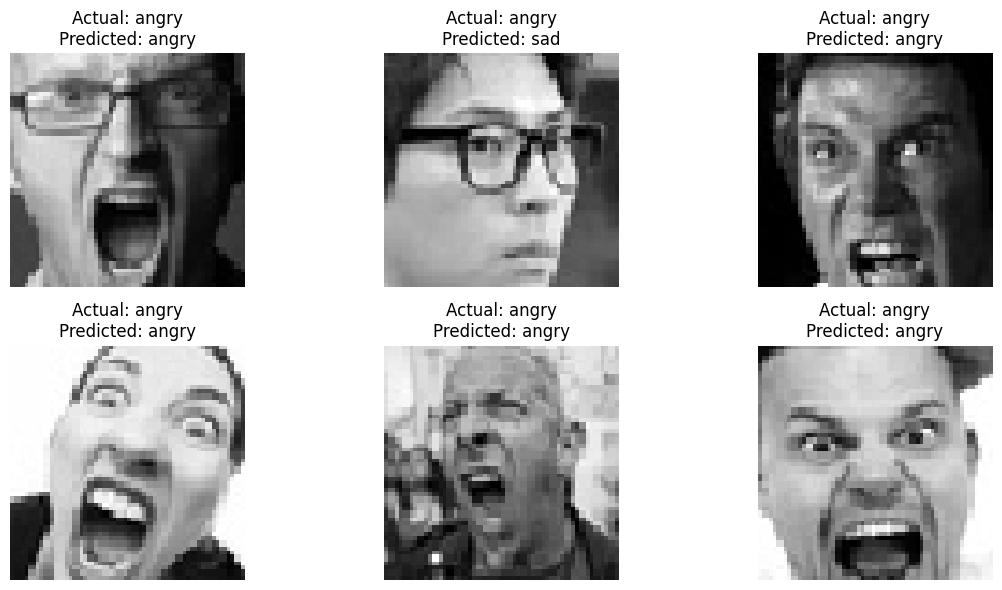

In [ ]:
import random
class_indices = {v: k for k, v in test_generator.class_indices.items()}

images, labels = next(test_generator)
predictions = np.argmax(model.predict(images), axis=1)

indices = list(range(len(images)))
random.shuffle(indices)

plt.figure(figsize=(12, 6))
for i in range(6):
    idx = indices[i]
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[idx].reshape(64, 64), cmap='gray')
    actual = class_indices[np.argmax(labels[idx])]
    predicted = class_indices[predictions[idx]]
    plt.title(f"Actual: {actual}\nPredicted: {predicted}")
    plt.axis('off')

plt.tight_layout()
plt.show()